<a href="https://colab.research.google.com/github/lucianogaldino/Projeto-Machine-Learning--Analise-de-Credito/blob/master/analise_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DESCRIÇÃO DA SITUAÇÃO PROBLEMA**

O objetivo desse projeto é de selecionar o melhor algoritmo de Machine Learning para análise de crédito.
Como parâmetro, está sendo utilizado uma planilha de dados (credit_data.csv) contendo 2000 registros, com quatro atributos previsores (id cliente, salário/renda, idade e empréstimo solicitado) e um atributo classe (pagamento realizado ou não realizado).

## **ESTRATÉGIA PARA SOLUÇÃO DO PROBLEMA**

Serão aplicados os algoritmos de clasificação de aprendizagem supervisionada de Machine Learning (Naive Bayes, Árvores de decisão, Random forest, aprendizagem por instâncias, Regressão logística, SVM (Máquinas de Vetores de Suporte) e Redes neurais artificiais) e será verificado o melhor algoritmo para essa situação problema.

## ANÁLISE INICIAL E TRATAMENTO DOS DADOS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
base = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Análise de crédito/credit_data.csv', sep=',')

In [5]:
base

,i#clientid,income,age,loan,c#default
0,1,66155.93,59.02,8106.53,0
1,2,34415.15,48.12,6564.75,0
2,3,57317.17,63.11,8020.95,0
3,4,42709.53,45.75,6103.64,0
4,5,66952.69,18.58,8770.10,1
...,...,...,...,...,...
1995,1996,59221.04,48.52,1926.73,0
1996,1997,69516.13,23.16,3503.18,0
1997,1998,44311.45,28.02,5522.79,1
1998,1999,43756.06,63.97,1622.72,0


In [6]:
base1 = base.rename(columns={'c#default': 'pay'})

In [7]:
base1

,i#clientid,income,age,loan,pay
0,1,66155.93,59.02,8106.53,0
1,2,34415.15,48.12,6564.75,0
2,3,57317.17,63.11,8020.95,0
3,4,42709.53,45.75,6103.64,0
4,5,66952.69,18.58,8770.10,1
...,...,...,...,...,...
1995,1996,59221.04,48.52,1926.73,0
1996,1997,69516.13,23.16,3503.18,0
1997,1998,44311.45,28.02,5522.79,1
1998,1999,43756.06,63.97,1622.72,0


idcliente = id dos clientes (variável categórica nominal ou variável numérica discreta).

income = renda (variável numérica contínua).

age = idade (váriavel numérica contínua, pois não estão representados por inteiros).

loan = empréstimo (variável númerica contínua).

pay = situação: 0 para pagou ou 1 para não pagou (variável numérica discreta).



In [8]:
# analisar se os atributos estão corretamente clasificados:
base1.dtypes

i#clientid      int64
income        float64
age           float64
loan          float64
pay             int64
dtype: object

In [9]:
#   Verificação da existência de valores nulos (NAN)
base1.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
pay           0
dtype: int64

In [10]:
# Encontrados três valores nulos no atributo age
base1.loc[pd.isnull(base['age'])]

,i#clientid,income,age,loan,pay
28,29,59417.81,NaN,2082.63,0
30,31,48528.85,NaN,6155.78,0
31,32,23526.30,NaN,2862.01,0


In [11]:
# Verificação de valores negativos
base1.loc[base.age < 0, :]
# encontrados três valores negativos no atributo age

,i#clientid,income,age,loan,pay
15,16,50501.73,-28.22,3977.29,0
21,22,32197.62,-52.42,4244.06,0
26,27,63287.04,-36.50,9595.29,0


Foram encontrados 6 problemas com relação ao atributo idade. Não quero excluí-los, portanto, vou colocar a média das idades para esses valores.

In [12]:
base1['age'].mean() # média geral

40.80766149223845

In [13]:
base1['age'][base1.age > 0].mean() # média somente com os valores corretos

40.92780341023079

In [14]:
base1.loc[base.age < 0, 'age'] = 40.93 #colocado a média nos valores negativos

In [15]:
base1.loc[base.age < 0, :]

,i#clientid,income,age,loan,pay
15,16,50501.73,40.93,3977.29,0
21,22,32197.62,40.93,4244.06,0
26,27,63287.04,40.93,9595.29,0


In [16]:
#substituindo o NaN pela média 40.93.
base1['age'].fillna(value=40.92, inplace =True) 

In [17]:
base1.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
pay           0
dtype: int64

## ANÁLISES ESTATÍSTICAS

In [28]:
from scipy import stats

In [29]:
base1.describe()

,i#clientid,income,age,loan,pay
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.599930,40.927795,4444.369635,0.141500
std,577.494589,14326.327142,13.251940,3045.409995,0.348624
min,1.000000,20014.490000,18.060000,1.380000,0.000000
25%,500.750000,32796.457500,29.100000,1939.705000,0.000000
50%,1000.500000,45789.120000,41.300000,3974.720000,0.000000
75%,1500.250000,57791.285000,52.582500,6432.407500,0.000000
max,2000.000000,69995.690000,63.970000,13766.050000,1.000000


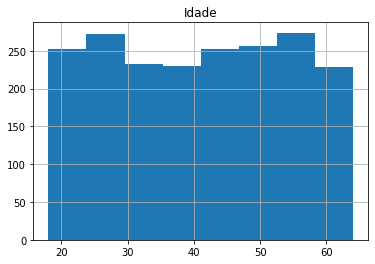

In [30]:
base1.age.hist(bins=8)
plt.title('Idade')
plt.show()

As idades estão bem distribuídas, nenhuma faixa etária está destacada.

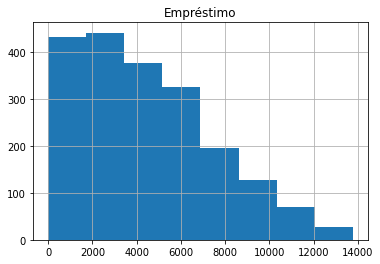

In [31]:
base1.loan.hist(bins=8)
plt.title('Empréstimo')
plt.show()

Os empréstimos de valores altos são restritos.

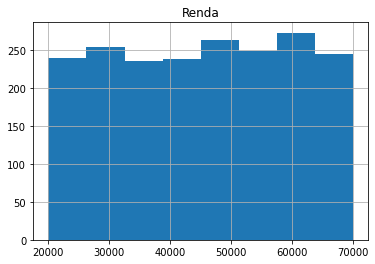

In [32]:
base1.income.hist(bins=8)
plt.title('Renda')
plt.show()

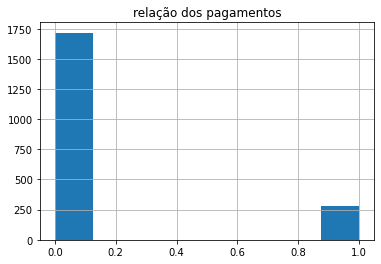

In [33]:
base1.pay.hist(bins=8)
plt.title('relação dos pagamentos')
plt.show()

Pelo gráfico, uma grande quantidade de pessoas não pagaram.

In [34]:
#Número de pessoas que não pagaram o empréstimo.
base1['pay'][base1.pay == 1].sum() 

283

Rendas entre 20000 e 70000 também estão bem distribuídas nos dados.

In [35]:
# Analisando valores outlier
import plotly.express as px

fig = px.box(base1, y='age')
fig.update_layout( width=600,height=600)
fig.show()

In [36]:
import plotly.express as px

fig = px.box(base1, y='income')
fig.update_layout( width=600,height=600)
fig.show()

In [37]:
import plotly.express as px

fig = px.box(base1, y='loan')
fig.update_layout( width=600,height=600)
fig.show()

Os valores outliers aqui são referentes aos empréstimos altos, não convém retirá-los para essa análise.

## **CORRELAÇÕES**

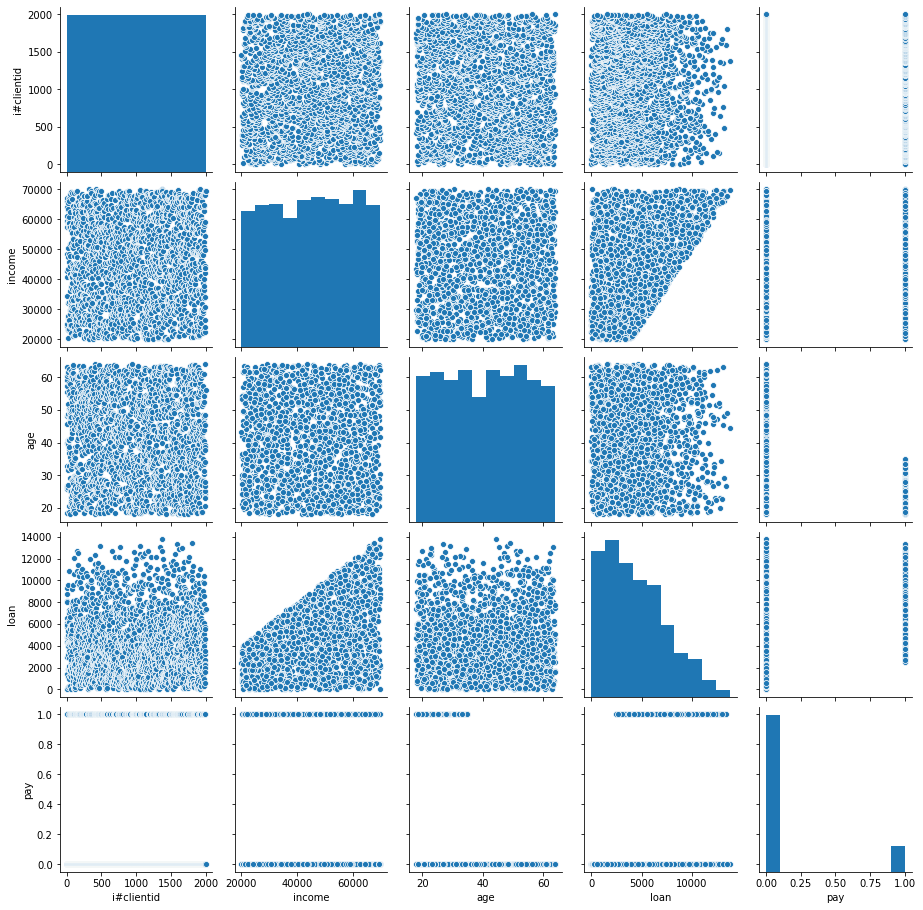

In [38]:
sns.pairplot(base1)

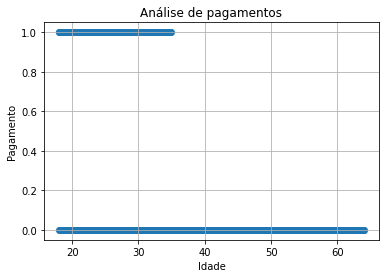

In [39]:
plt.scatter(base1.age,base1.pay)
plt.xlabel('Idade')
plt.ylabel('Pagamento')
plt.title('Análise de pagamentos')
plt.grid(True)
plt.show()

Pelo gráfico, a concentração dos não pagantes está entre 18 e 35 anos.

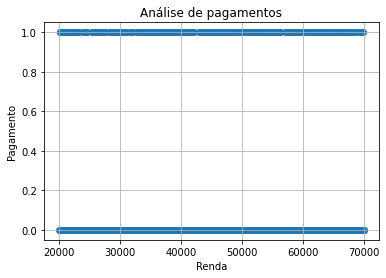

In [40]:
plt.scatter(base1.income,base1.pay)
plt.xlabel('Renda')
plt.ylabel('Pagamento')
plt.title('Análise de pagamentos')
plt.grid(True)
plt.show()

Pelo gráfico não há distinção entre pagamento e a renda

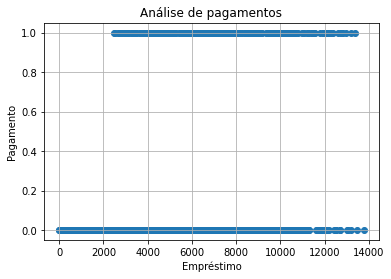

In [41]:
plt.scatter(base1.loan,base1.pay)
plt.xlabel('Empréstimo')
plt.ylabel('Pagamento')
plt.title('Análise de pagamentos')
plt.grid(True)
plt.show()

In [42]:
correlacoes = base1.corr()

In [43]:
correlacoes

,i#clientid,income,age,loan,pay
i#clientid,1.000000,0.039280,-0.030443,0.018931,-0.020145
income,0.039280,1.000000,-0.033207,0.441117,0.002284
age,-0.030443,-0.033207,1.000000,0.006677,-0.445140
loan,0.018931,0.441117,0.006677,1.000000,0.377160
pay,-0.020145,0.002284,-0.445140,0.377160,1.000000


Não há nenhuma forte correlação entre os atributos.

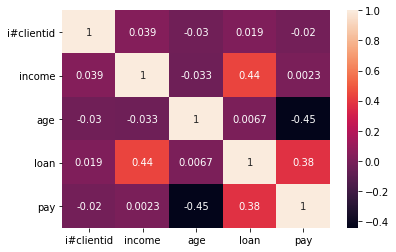

In [44]:
plt.figure()
sns.heatmap(correlacoes, annot=True)

## **MACHINE LEARNING**

Será utilizada a validação cruzada para as bases de treinamento/teste e com 10 folds.

## Naive Bayes

In [45]:
previsores = base1.iloc[:, 1:4].values
classe = base1.iloc[:, 4].values

In [46]:
# Escalonamento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)
# Número de folds =10, isto é, fará dez testes com bases de teste e treinamento diferentes, 
# shuffle =True para garantir a aleatóriedade dos dados de testes/treinamento.
# random_state = 3 para mudar as bases a cada nova análise com 3 sementes geradoras aleatórias.


In [49]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = GaussianNB()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [50]:
matriz_final = np.mean(matrizes, axis = 0)

In [51]:
matriz_final # Média da matriz de confusão 

array([[168. ,   3.7],
       [ 11.3,  17. ]])

In [52]:
resultados = np.asarray(resultados)

In [53]:
resultados

array([0.945, 0.935, 0.91 , 0.92 , 0.89 , 0.92 , 0.915, 0.925, 0.95 ,
       0.94 ])

In [54]:
resultados.mean()

0.925

In [55]:
resultados.std()

0.017175564037317643

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão: 0,0171 (Não houve diferença entre o escalonamento e sem escalonamento).

## Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [60]:
matriz_final = np.mean(matrizes, axis = 0)

In [61]:
matriz_final

array([[170. ,   1.7],
       [  1.3,  27. ]])

In [62]:
resultados = np.asarray(resultados)

In [63]:
resultados.mean()

0.985

In [64]:
resultados.std()

0.012247448713915901

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [67]:
matriz_final = np.mean(matrizes, axis = 0)

In [68]:
matriz_final

array([[170.9,   0.8],
       [  2.4,  25.9]])

In [69]:
resultados = np.asarray(resultados)

In [70]:
resultados.mean()

0.984

In [71]:
resultados.std()

0.01019803902718558

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

Random Forest: precisão = 0.984, desvio padrão = 0.0102

## Aprendizagem por Instâncias (KNN)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [79]:
matriz_final = np.mean(matrizes, axis = 0)

In [80]:
matriz_final

array([[170. ,   1.7],
       [  2.1,  26.2]])

In [81]:
resultados = np.asarray(resultados)

In [82]:
resultados.mean()

0.9809999999999999

In [83]:
resultados.std()

0.009695359714832668

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

Random Forest: precisão = 0.984, desvio padrão = 0.0102

KNN: precisão = 0.981, desvio padrão = 0.0097

## Regressão Logística

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = LogisticRegression(random_state = 1, solver='lbfgs')
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [87]:
matriz_final = np.mean(matrizes, axis = 0)

In [88]:
matriz_final

array([[167.5,   4.2],
       [  6.1,  22.2]])

In [89]:
resultados = np.asarray(resultados)

In [90]:
resultados.mean()

0.9484999999999999

In [91]:
resultados.std()

0.012051970793193936

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

Random Forest: precisão = 0.984, desvio padrão = 0.0102

KNN: precisão = 0.981, desvio padrão = 0.0097

Regressão Logística: precisão = 0.9485, desvio padrão = 0.0121

## Vetores de Suporte (SVM)

In [92]:
from sklearn.svm import SVC

In [93]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = SVC(kernel = 'rbf', random_state = 1, C = 2.3, gamma='auto')
    #utilizar para kernel o linear e o poly. Além disso mudar o valor de C, quando maior ele maior será a precisão. O default do c é 1.
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [94]:
matriz_final = np.mean(matrizes, axis = 0)

In [95]:
matriz_final

array([[169.9,   1.8],
       [  1.4,  26.9]])

In [96]:
resultados = np.asarray(resultados)

In [97]:
resultados.mean()

0.984

In [98]:
resultados.std()

0.008000000000000007

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

Random Forest: precisão = 0.984, desvio padrão = 0.0102

KNN: precisão = 0.981, desvio padrão = 0.0097

Regressão Logística: precisão = 0.9484, desvio padrão = 0.012

SVM: precisão = 0.984, desvio padrão = 0.008

## Redes Neurais

In [99]:
from sklearn.neural_network import MLPClassifier

In [106]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = MLPClassifier(verbose = True, #verbose vai indicando a diminuição do erro em cada história
                              max_iter=1000, #limita rodar até 1000 vezes para diminuir o erro, mas se o algortimo perceber que não está melhorando, ele para antes
                              tol = 0.00010, #solicitação para chegar nesse erro, mas pode ser que não seja possível
                              solver = 'adam', #algoritmo utilizado para otimização dos pesos. Adam é default, ele é bem utilizado para valores altos, mas tem outros
                              hidden_layer_sizes=(100), #cada camada oculta tem 100 neurônios, se colocar (100, 100), teriam duas camadas ocultas. 100 é default
                              activation='relu') #camada de ativação default é relu
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

Iteration 1, loss = 0.73447085
Iteration 2, loss = 0.64342296
Iteration 3, loss = 0.56797536
Iteration 4, loss = 0.50592598
Iteration 5, loss = 0.45581620
Iteration 6, loss = 0.41537911
Iteration 7, loss = 0.38094161
Iteration 8, loss = 0.35226595
Iteration 9, loss = 0.32748099
Iteration 10, loss = 0.30586975
Iteration 11, loss = 0.28682910
Iteration 12, loss = 0.26951006
Iteration 13, loss = 0.25429945
Iteration 14, loss = 0.24048351
Iteration 15, loss = 0.22812394
Iteration 16, loss = 0.21710550
Iteration 17, loss = 0.20701355
Iteration 18, loss = 0.19795534
Iteration 19, loss = 0.18953314
Iteration 20, loss = 0.18182145
Iteration 21, loss = 0.17485721
Iteration 22, loss = 0.16838219
Iteration 23, loss = 0.16248769
Iteration 24, loss = 0.15704418
Iteration 25, loss = 0.15196223
Iteration 26, loss = 0.14734375
Iteration 27, loss = 0.14303228
Iteration 28, loss = 0.13892688
Iteration 29, loss = 0.13513670
Iteration 30, loss = 0.13161412
Iteration 31, loss = 0.12829876
Iteration 32, los

In [107]:
matriz_final = np.mean(matrizes, axis = 0)

In [108]:
matriz_final

array([[171.4,   0.3],
       [  0.3,  28. ]])

In [109]:
resultados = np.asarray(resultados)

In [110]:
resultados.mean()

0.9970000000000001

In [111]:
resultados.std()

0.0024494897427831805

Resultado parcial:

Naive Bayes: precisão = 0.925 , desvio padrão = 0.0171 (Não houve diferença entre o escalonamento e sem escalonamento).

Árvore de decisão: precisão = 0.985, desvio padrão = 0.0122

Random Forest: precisão = 0.984, desvio padrão = 0.0102

KNN: precisão = 0.981, desvio padrão = 0.0097

Regressão Logística: precisão = 0.9484, desvio padrão = 0.012

SVM: precisão = 0.984, desvio padrão = 0.008

Redes Neurais: precisão = 0.997, desvio padrão = 0.0024

## **CONCLUSÃO:**

O melhor algoritmo foi o de redes neurais artificiais com precisão de 0.997 e desvio padrão de 0.0024. Mas outros algoritmos (SVM, KNN, Random Forest e Árvore de decisão) tiveram ótimos resultados, acima de 0.98 de precisão.